# GMU ECE 527 - Computer Exercise #8 Part 1 - Code
**Stewart Schuler - G01395779**\
**20241205**

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Input as Input
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
#import numpy as np
#from keras.utils import np_utils
import matplotlib
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'keras.util'

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
img_x, img_y = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1 )
x_test  = x_test.reshape( x_test.shape[0],  img_x, img_y, 1 )

x_train = x_train.astype('float32')
x_test  = x_test.astype( 'float32')
x_train /= 255.0
x_test  /= 255.0

print(y_train.shape)
print(y_train[0])
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)
print(y_train.shape)
print(y_train[0])

(60000,)
5
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [29]:
model = Sequential()
model.add(Flatten())
model.add(keras.Input(shape=(28,28,)))
model.add(Dense(32,))
model.add(Dense(10))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input_layer_2 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1000)           │     1,025,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,087,106 (4.15 MB)

 Trainable params: 1,087,106 (4.15 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test), callbacks=None)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8862 - loss: 0.3672 - val_accuracy: 0.9879 - val_loss: 0.0373
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9877 - loss: 0.0408 - val_accuracy: 0.9889 - val_loss: 0.0354
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9917 - loss: 0.0268 - val_accuracy: 0.9906 - val_loss: 0.0273
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9949 - loss: 0.0168 - val_accuracy: 0.9916 - val_loss: 0.0262
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9950 - loss: 0.0151 - val_accuracy: 0.9900 - val_loss: 0.0326
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9958 - loss: 0.0122 - val_accuracy: 0.9905 - val_loss: 0.0291
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9968 - loss: 0.0091 - val_accuracy: 0.9920 - val_loss: 0.0307
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9975 - loss: 0.0072 - 

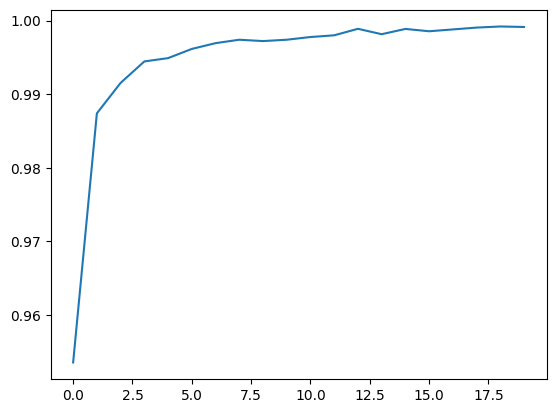

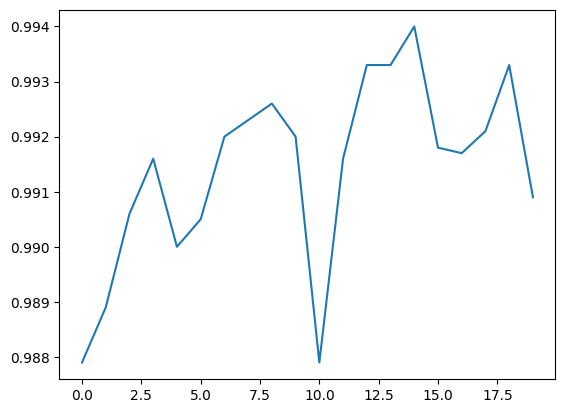

In [39]:
plt.figure()
plt.plot( hist.history['accuracy'])
plt.figure()
plt.plot( hist.history['val_accuracy'])


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_22 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7228 - loss: 1.0496 - val_accuracy: 0.9025 - val_loss: 0.3815
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9009 - loss: 0.3735 - val_accuracy: 0.9142 - val_loss: 0.3195
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9125 - loss: 0.3238 - val_accuracy: 0.9185 - val_loss: 0.2965
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9135 - loss: 0.3079 - val_accuracy: 0.9188 - val_loss: 0.2861
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9185 - loss: 0.2882 - val_accuracy: 0.9221 - val_loss: 0.2809
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9210 - loss: 0.2830 - val_accuracy: 0.9221 - val_loss: 0.2745
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9236 - loss: 0.2714 - val_accuracy: 0.9244 - val_loss: 0.2713
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9256 - loss: 0.2687 - val_accuracy: 0.

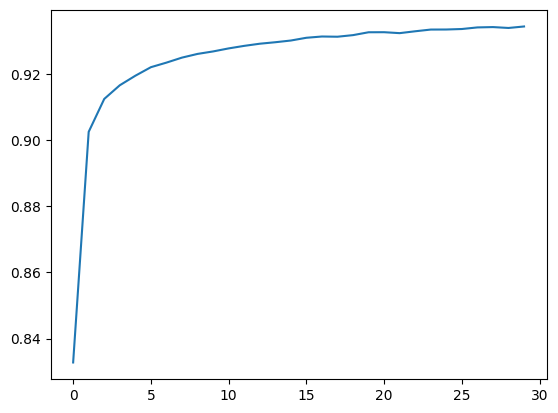

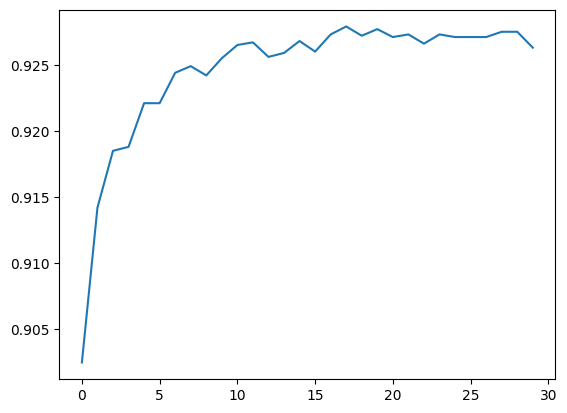

In [73]:
model_lr = Sequential()
model_lr.add(Input((28,28,1)))
model_lr.add(Flatten())
model_lr.add(Dense(10,activation='softmax'))
model_lr.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])

model_lr.summary()
hist = model_lr.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1, validation_data=(x_test, y_test), callbacks=None)
plt.figure()
plt.plot( hist.history['accuracy'])
plt.figure()
plt.plot( hist.history['val_accuracy'])


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_29 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 30)             │        23,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,860 (93.20 KB)

 Trainable params: 23,860 (93.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7424 - loss: 0.8991 - val_accuracy: 0.9218 - val_loss: 0.2746
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9245 - loss: 0.2687 - val_accuracy: 0.9348 - val_loss: 0.2256
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9389 - loss: 0.2153 - val_accuracy: 0.9446 - val_loss: 0.1919
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9498 - loss: 0.1787 - val_accuracy: 0.9498 - val_loss: 0.1693
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9546 - loss: 0.1606 - val_accuracy: 0.9544 - val_loss: 0.1553
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9605 - loss: 0.1394 - val_accuracy: 0.9562 - val_loss: 0.1448
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9629 - loss: 0.1330 - val_accuracy: 0.9583 - val_loss: 0.1402
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9661 - loss: 0.1183 - val_accuracy: 0.

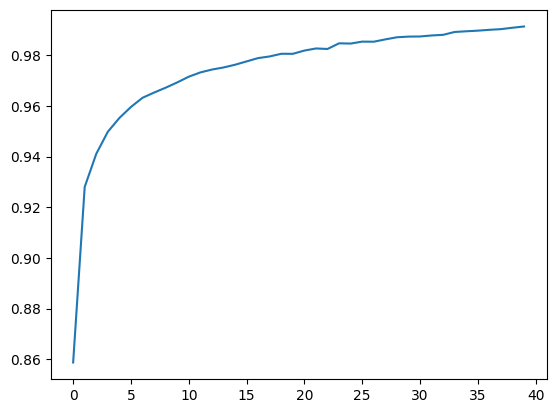

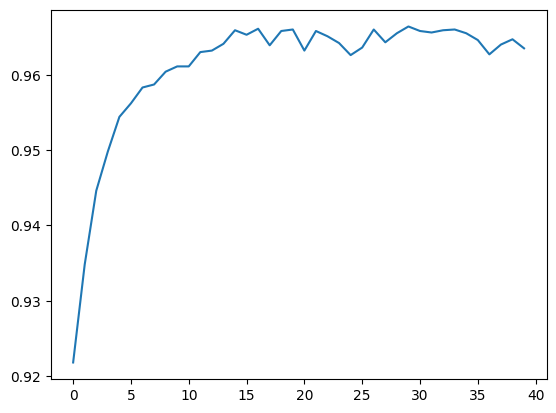

In [80]:
model_1h = Sequential()
model_1h.add(Input((28,28,1)))
model_1h.add(Flatten())
model_1h.add(Dense(30,activation='relu'))
model_1h.add(Dense(10,activation='softmax'))
model_1h.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])

model_1h.summary()
hist = model_1h.fit(x_train, y_train, batch_size=128, epochs=40, verbose=1, validation_data=(x_test, y_test), callbacks=None)
plt.figure()
plt.plot( hist.history['accuracy'])
plt.figure()
plt.plot( hist.history['val_accuracy'])


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_36 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 26)             │        20,410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 20)             │           540 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,160 (82.66 KB)

 Trainable params: 21,160 (82.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6714 - loss: 1.0516 - val_accuracy: 0.9260 - val_loss: 0.2536
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9283 - loss: 0.2495 - val_accuracy: 0.9410 - val_loss: 0.2007
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9434 - loss: 0.1948 - val_accuracy: 0.9472 - val_loss: 0.1757
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9514 - loss: 0.1682 - val_accuracy: 0.9531 - val_loss: 0.1560
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9573 - loss: 0.1457 - val_accuracy: 0.9582 - val_loss: 0.1413
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9617 - loss: 0.1315 - val_accuracy: 0.9565 - val_loss: 0.1431
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9635 - loss: 0.1272 - val_accuracy: 0.9597 - val_loss: 0.1295
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9650 - loss: 0.1168 - val_accuracy: 0.

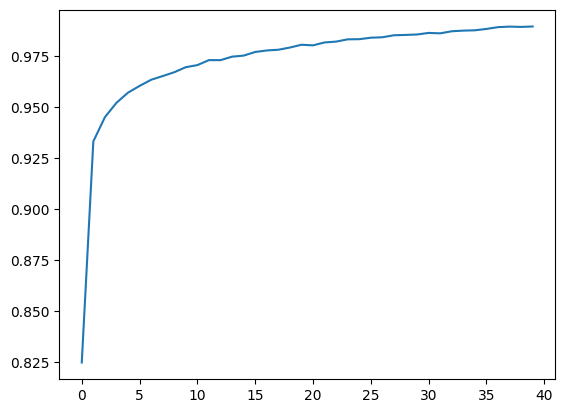

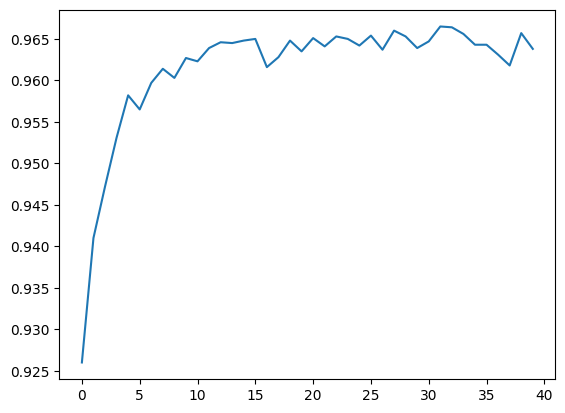

In [87]:
model_2h = Sequential()
model_2h.add(Input((28,28,1)))
model_2h.add(Flatten())
model_2h.add(Dense(26,activation='relu'))
model_2h.add(Dense(20,activation='relu'))
model_2h.add(Dense(10,activation='softmax'))
model_2h.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])

model_2h.summary()
hist = model_2h.fit(x_train, y_train, batch_size=128, epochs=40, verbose=1, validation_data=(x_test, y_test), callbacks=None)
plt.figure()
plt.plot( hist.history['accuracy'])
plt.figure()
plt.plot( hist.history['val_accuracy'])


In [95]:
model_h10 = Sequential()
model_h10.add(Input(shape=(28,28,)))
model_h10.add(Flatten())
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='softmax'))

model_h10.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])

model_h10.summary()
hist = model_h10.fit(x_train, y_train, batch_size=128, epochs=40, verbose=1, validation_data=(x_test, y_test), callbacks=None)

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_38 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,950 (34.96 KB)

 Trainable params: 8,950 (34.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2909 - loss: 1.8685 - val_accuracy: 0.7402 - val_loss: 0.8150
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7567 - loss: 0.7641 - val_accuracy: 0.8328 - val_loss: 0.5613
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8443 - loss: 0.5425 - val_accuracy: 0.8557 - val_loss: 0.4881
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8712 - loss: 0.4465 - val_accuracy: 0.8811 - val_loss: 0.4031
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8808 - loss: 0.4143 - val_accuracy: 0.8857 - val_loss: 0.3867
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8912 - loss: 0.3825 - val_accuracy: 0.8860 - val_loss: 0.3868
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8955 - loss: 0.3647 - val_accuracy: 0.8945 - val_loss: 0.3679
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9011 - loss: 0.3495 - val_accuracy: 0.

In [96]:
model_h32 = Sequential()
model_h32.add(Input(shape=(28,28,)))
model_h32.add(Flatten())
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(10, activation='softmax'))

model_h32.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])

model_h32.summary()
hist = model_h32.fit(x_train, y_train, batch_size=128, epochs=40, verbose=1, validation_data=(x_test, y_test), callbacks=None)

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_39 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,954 (136.54 KB)

 Trainable params: 34,954 (136.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5653 - loss: 1.1947 - val_accuracy: 0.9030 - val_loss: 0.3458
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9142 - loss: 0.3054 - val_accuracy: 0.9347 - val_loss: 0.2286
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9413 - loss: 0.2039 - val_accuracy: 0.9450 - val_loss: 0.1880
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9512 - loss: 0.1675 - val_accuracy: 0.9527 - val_loss: 0.1671
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9587 - loss: 0.1431 - val_accuracy: 0.9552 - val_loss: 0.1543
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9649 - loss: 0.1219 - val_accuracy: 0.9470 - val_loss: 0.1816
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9678 - loss: 0.1140 - val_accuracy: 0.9583 - val_loss: 0.1480
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9706 - loss: 0.1012 - val_accuracy: 0.

In [102]:
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(5, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(5, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])

model.summary()
hist = model.fit(x_train, y_train, batch_size=128, epochs=40, verbose=1, validation_data=(x_test, y_test), callbacks=None)

Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 5)      │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 12, 12, 5)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 10, 10, 5)      │           230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_45 (Flatten)            │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 20)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,090 (12.07 KB)

 Trainable params: 3,090 (12.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5877 - loss: 1.2765 - val_accuracy: 0.9410 - val_loss: 0.2165
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9429 - loss: 0.1984 - val_accuracy: 0.9588 - val_loss: 0.1393
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9583 - loss: 0.1431 - val_accuracy: 0.9679 - val_loss: 0.1035
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9659 - loss: 0.1165 - val_accuracy: 0.9706 - val_loss: 0.0918
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9684 - loss: 0.1024 - val_accuracy: 0.9754 - val_loss: 0.0791
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9725 - loss: 0.0902 - val_accuracy: 0.9775 - val_loss: 0.0735
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9737 - loss: 0.0865 - val_accuracy: 0.9791 - val_loss: 0.0685
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9759 - loss: 0.0827 - val_accu